Lab | Unsupervised learning intro
Instructions
It's the moment to perform clustering on the songs you collected. Remember that the ultimate goal of this little project is to improve the recommendations of artists. Clustering the songs will allow the recommendation system to limit the scope of the recommendations to only songs that belong to the same cluster - songs with similar audio features.

The experiments you did with the Spotify API and the Billboard web scraping will allow you to create a pipeline such that when the user enters a song, you:

1. Check whether or not the song is in the Billboard Hot 200.
2. Collect the audio features from the Spotify API.
After that, you want to send the Spotify audio features of the submitted song to the clustering model, which should return a cluster number.

We want to have as many songs as possible to create the clustering model, so we will add the songs you collected to a bigger dataset available on Kaggle containing 160 thousand songs.

In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\anasa\Desktop\Ana\IRONHACK\Labs\Python ll\Lab Unsupervised learning intro\spotify_songs.csv")


In [2]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [3]:
# Librerías para resolver el problema de Clusterización
import numpy as np
from sklearn.cluster import KMeans

In [4]:
df.columns.tolist
df1=df[["track_artist", "playlist_genre", "playlist_subgenre", "tempo", "loudness"]]
df1.head()

,track_artist,playlist_genre,playlist_subgenre,tempo,loudness
0,Ed Sheeran,pop,dance pop,122.036,-2.634
1,Maroon 5,pop,dance pop,99.972,-4.969
2,Zara Larsson,pop,dance pop,124.008,-3.432
3,The Chainsmokers,pop,dance pop,121.956,-3.778
4,Lewis Capaldi,pop,dance pop,123.976,-4.672


In [5]:
# Supongamos que queremos armar clusters de canciones a partir de las variables 
# track_artist, playlist_genre, playlist_subgenre, tempo, loudness:
#X = np.array(list(zip(df['track_artist'], df['playlist_genre'], df['playlist_subgenre'], df['tempo'], df['loudness'])))
X = df1

In [6]:
df1.dtypes

track_artist          object
playlist_genre        object
playlist_subgenre     object
tempo                float64
loudness             float64
dtype: object

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Supongamos que tu DataFrame es 'df1'
# Seleccionar columnas que no sean de tipo float64
categoricals = df1.select_dtypes(exclude=['float64'])

# Inicializar el LabelEncoder
label_encoder = LabelEncoder()

# Aplicar LabelEncoder a cada columna categórica
for column in categoricals.columns:
    categoricals[column] = label_encoder.fit_transform(categoricals[column])

# Seleccionar columnas numéricas
numericals = df1.select_dtypes(include=['float64', 'int64'])

# Concatenar las columnas categóricas codificadas con las columnas numéricas
df_coded = pd.concat([categoricals, numericals.reset_index(drop=True)], axis=1)

# Verificar el DataFrame final
print(df_coded.head())
print(df_coded.dtypes)


   track_artist  playlist_genre  playlist_subgenre    tempo  loudness
0          2782               2                  3  122.036    -2.634
1          6084               2                  3   99.972    -4.969
2         10416               2                  3  124.008    -3.432
3          9215               2                  3  121.956    -3.778
4          5402               2                  3  123.976    -4.672
track_artist           int32
playlist_genre         int32
playlist_subgenre      int32
tempo                float64
loudness             float64
dtype: object


K: 1. Inertia: 316389247621.62
K: 2. Inertia: 77770334619.79
K: 3. Inertia: 34384571134.66
K: 4. Inertia: 19577135549.27
K: 5. Inertia: 12254784863.56
K: 6. Inertia: 8314154067.84
K: 7. Inertia: 6421181577.68
K: 8. Inertia: 4857143422.31
K: 9. Inertia: 3913140324.89
K: 10. Inertia: 3075021016.92


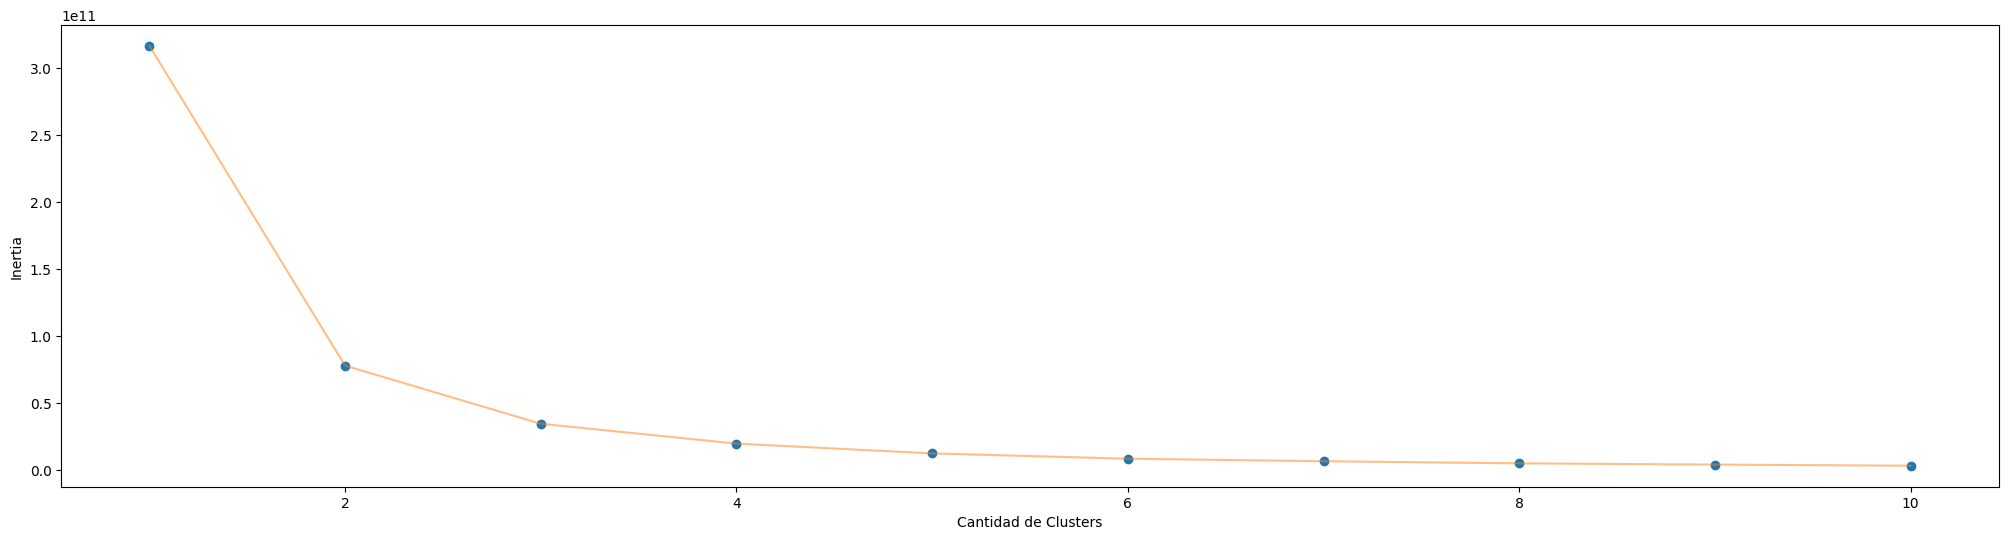

In [8]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
X1 = df_coded

inertia = []
k_range = range(1,11)

for k in k_range:
  # Instanciamos la clase
  algorithm = KMeans(
    n_clusters = k,
    init='k-means++',
    n_init = 10,
    max_iter=300,
    tol=0.0001
  )
  # Ejecutamos el problema de clusterización
  algorithm.fit(X1)
  inertia.append(algorithm.inertia_)
  print(f'K: {k}. Inertia: {algorithm.inertia_:.2f}')

plt.figure(1 , figsize = (25 ,6))
plt.plot(np.arange(1 , 11), inertia, 'o')
plt.plot(np.arange(1 , 11), inertia, '-', alpha = 0.5)
plt.xlabel('Cantidad de Clusters')
plt.ylabel('Inertia')
plt.show()

In [9]:
# Otras alternativas son realizar Clustering jerárquico en subconjuntos del conjunto de datos para determinar K, o utilizar los coeficientes de Silhouette:
# Importamos dos funciones para el calculo de las distancias
from scipy.spatial.distance import cdist, pdist

clusters_results = [KMeans(n_clusters = k, init='k-means++', n_init = 5, max_iter=100, tol=0.0001).fit(X1) for k in k_range]
centroids = [K.cluster_centers_ for K in clusters_results] # Coordenadas de los centroides
K_dist = [cdist(X1, centroid, 'euclidean') for centroid in centroids] # Distancia entre los vectores y los centroides
dist = [np.min(k_centroid, axis=1) for k_centroid in K_dist] # Minima distancia entre cada vector y los centroides (distancia del punto más cercano a cada centroide)
of_value = [sum(d**2) for d in dist] # Valor de la Función Objetivo para cada clusterización propuesta
max_inertia = sum(pdist(X1)**2)/X1.shape[0] # Maxima Intertia (cuando k=1)
exp_variance = max_inertia - of_value
exp_variance_perct = exp_variance/max_inertia*100


fig = plt.figure(1 , figsize = (25 ,6))
ax = fig.add_subplot(111)
ax.set_ylim((0,100))
plt.grid(True)
plt.plot(k_range, exp_variance_perct, 'o')
plt.plot(k_range, exp_variance_perct, '-', alpha = 0.5)

for xy in zip(k_range, exp_variance_perct):
  ax.annotate('{:.2f}%'.format(xy[1]), xy=xy, textcoords='data')

plt.xlabel('Cantidad de Clusters')
plt.ylabel('% of explained variance')
plt.title('Explained Variance vs K')
plt.show()